# Cross-Validation Methods in Machine Learning
    
This notebook demonstrates three important cross-validation concepts:
1. K-fold Cross-validation
2. Stratified Sampling

## Setup and Imports

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## 1. Create Synthetic Dataset
We'll create an imbalanced dataset to better demonstrate the differences between methods.

In [9]:
# Create synthetic dataset
X, y = make_classification(
    n_samples=1000,
    n_classes=2,
    weights=[0.7, 0.3],  # Imbalanced classes
    n_features=5,
    n_informative=3,
    random_state=42
)

print("Dataset shape:", X.shape)
print("Class distribution:", np.bincount(y))

Dataset shape: (1000, 5)
Class distribution: [703 297]


## 2. Visualization Functions
We'll create functions to visualize different cross-validation splits.

In [10]:
def plot_kfold(X, n_splits, stratified=False):
    if stratified:
        kf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)
        title = f'Stratified {n_splits}-fold Cross-validation'
    else:
        kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
        title = f'Standard {n_splits}-fold Cross-validation'
    
    fig, ax = plt.subplots(figsize=(15, 3))
    
    for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
        ax.scatter(train_idx, [fold + 0.5] * len(train_idx), 
                  c='blue', alpha=0.3, s=10, label='Training' if fold == 0 else "")
        ax.scatter(val_idx, [fold + 0.5] * len(val_idx), 
                  c='red', alpha=0.3, s=10, label='Validation' if fold == 0 else "")
    
    ax.set_title(title)
    ax.set_ylabel('Fold')
    ax.set_xlabel('Sample Index')
    plt.legend()
    plt.tight_layout()
    plt.show()

## 3. Standard K-fold Cross-validation
Standard k-fold randomly splits the data into k parts.

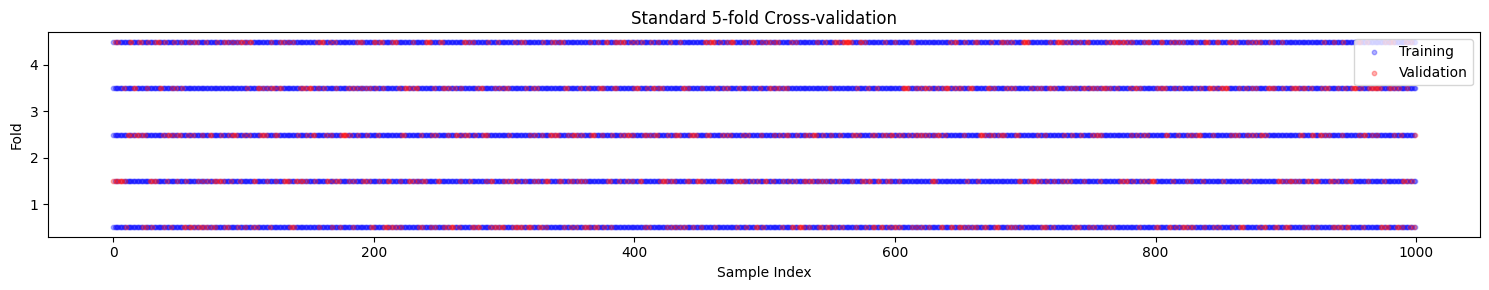


Class distribution in each fold:
Fold 1 validation set class distribution: [138  62]
Fold 2 validation set class distribution: [144  56]
Fold 3 validation set class distribution: [136  64]
Fold 4 validation set class distribution: [145  55]
Fold 5 validation set class distribution: [140  60]


In [11]:
# Plot standard K-fold
plot_kfold(X, n_splits=5, stratified=False)

# Print class distribution in each fold
kf = KFold(n_splits=5, shuffle=True, random_state=42)
print("\nClass distribution in each fold:")
for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
    print(f"Fold {fold + 1} validation set class distribution:", np.bincount(y[val_idx]))

## 4. Stratified K-fold Cross-validation
Stratified k-fold maintains the same class distribution in each fold.

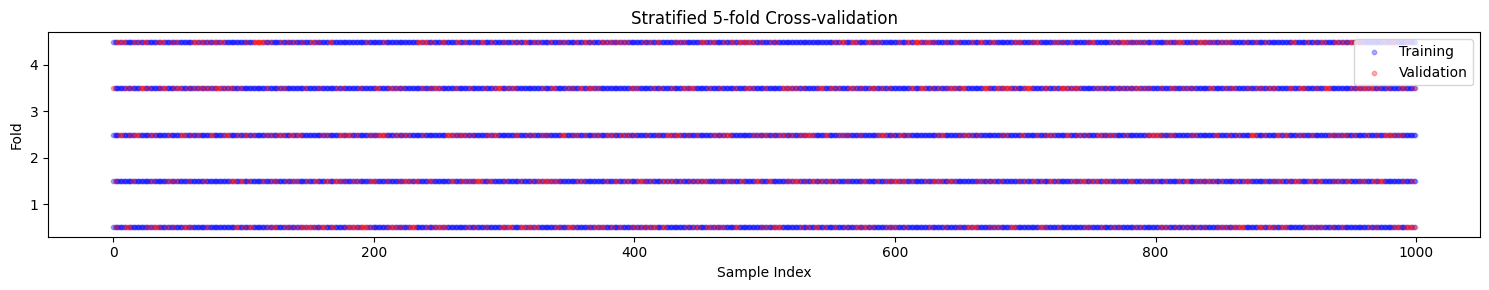


Class distribution in each fold:
Fold 1 validation set class distribution: [141  59]
Fold 2 validation set class distribution: [141  59]
Fold 3 validation set class distribution: [141  59]
Fold 4 validation set class distribution: [140  60]
Fold 5 validation set class distribution: [140  60]


In [12]:
# Plot stratified K-fold
plot_kfold(X, n_splits=5, stratified=True)

# Print class distribution in each fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
print("\nClass distribution in each fold:")
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y)):
    print(f"Fold {fold + 1} validation set class distribution:", np.bincount(y[val_idx]))

## 5. Performance Comparison
Let's compare the performance of different cross-validation methods.

/tmp/ipykernel_3815788/1168042468.py:31: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(cv_results.values(), labels=cv_results.keys())


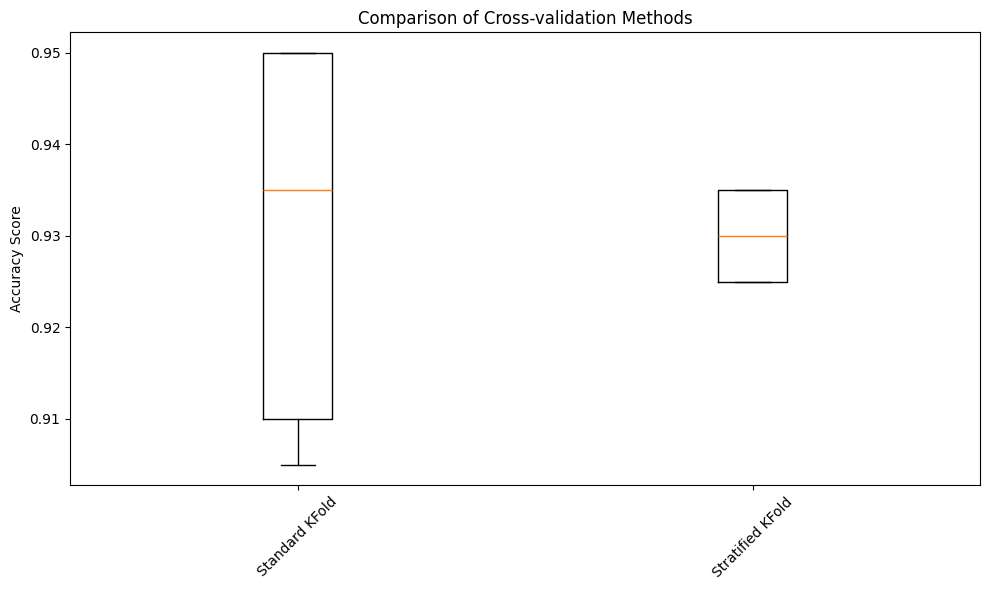

Standard KFold: Mean=0.9300, Std=0.0192
Stratified KFold: Mean=0.9300, Std=0.0045


In [13]:
def evaluate_cv_methods(X, y, methods):
    
    results = {}
    
    for name, cv_method in methods.items():
        fold_scores = []
        for train_idx, val_idx in cv_method.split(X, y):
            X_train, X_val = X[train_idx], X[val_idx]
            y_train, y_val = y[train_idx], y[val_idx]
            
            model = LogisticRegression(random_state=42)
            model.fit(X_train, y_train)
            
            val_score = accuracy_score(y_val, model.predict(X_val))
            fold_scores.append(val_score)
        
        results[name] = fold_scores
    
    return results

# methods
methods = {
        'Standard KFold': KFold(n_splits=5, shuffle=True, random_state=42),
        'Stratified KFold': StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
}

# Calculate and plot results
cv_results = evaluate_cv_methods(X, y, methods)

plt.figure(figsize=(10, 6))
plt.boxplot(cv_results.values(), labels=cv_results.keys())
plt.title('Comparison of Cross-validation Methods')
plt.ylabel('Accuracy Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print mean scores
for method, scores in cv_results.items():
    print(f"{method}: Mean={np.mean(scores):.4f}, Std={np.std(scores):.4f}")

In [14]:
print("\nDetailed Statistics:")
for method, scores in cv_results.items():
    stats = {
        'Mean': np.mean(scores),
        'Median': np.median(scores),
        'Std Dev': np.std(scores),
        'Min': np.min(scores),
        'Max': np.max(scores)
    }
    print(f"\n{method}:")
    for stat_name, value in stats.items():
        print(f"{stat_name}: {value:.4f}")

# Analyze class distribution in each fold
print("\nClass Distribution Analysis:")

for name, cv_method in methods.items():
    print(f"\n{name}:")
    for fold, (_, val_idx) in enumerate(cv_method.split(X, y)):
        fold_dist = np.bincount(y[val_idx])
        print(f"Fold {fold + 1}: Class 0: {fold_dist[0]}, Class 1: {fold_dist[1]}")


Detailed Statistics:

Standard KFold:
Mean: 0.9300
Median: 0.9350
Std Dev: 0.0192
Min: 0.9050
Max: 0.9500

Stratified KFold:
Mean: 0.9300
Median: 0.9300
Std Dev: 0.0045
Min: 0.9250
Max: 0.9350

Class Distribution Analysis:

Standard KFold:
Fold 1: Class 0: 138, Class 1: 62
Fold 2: Class 0: 144, Class 1: 56
Fold 3: Class 0: 136, Class 1: 64
Fold 4: Class 0: 145, Class 1: 55
Fold 5: Class 0: 140, Class 1: 60

Stratified KFold:
Fold 1: Class 0: 141, Class 1: 59
Fold 2: Class 0: 141, Class 1: 59
Fold 3: Class 0: 141, Class 1: 59
Fold 4: Class 0: 140, Class 1: 60
Fold 5: Class 0: 140, Class 1: 60


## Key Takeaways

1. **Standard K-fold**
   - Simple random splitting
   - May not preserve class distribution
   - Good for balanced datasets

2. **Stratified K-fold**
   - Maintains class distribution in each fold
   - More stable results (lower std)
   - Preferred for imbalanced datasets